<a href="https://colab.research.google.com/github/tu-ru-tunc/PVLubimova/blob/main/%D0%B2%D1%8B%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D1%80%D0%B0%D1%81%D0%BD%D1%8B%D1%85_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving лес.jpg to лес (1).jpg


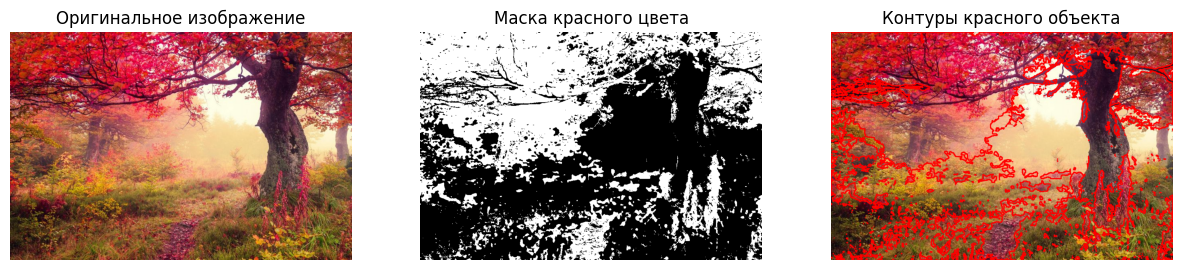

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

# Преобразуем изображение из BGR в HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определяем диапазоны для красного цвета
lower_red1 = np.array([0, 100, 100])  # Нижний диапазон для красного
upper_red1 = np.array([10, 255, 255])  # Верхний диапазон для красного
lower_red2 = np.array([160, 100, 100])  # Нижний диапазон для красного
upper_red2 = np.array([180, 255, 255])  # Верхний диапазон для красного

# Создаем маски для красного цвета
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask = mask1 | mask2  # Объединяем маски

# Находим контуры на маске
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисуем контуры на оригинальном изображении красным цветом
contoured_image = image.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 0, 255), 2)  # Красный цвет в BGR

# Отображаем оригинальное изображение, маску и изображение с контурами
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Маска красного цвета')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.title('Контуры красного объекта')
plt.axis('off')

plt.show()